In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive//MyDrive//New_Emotions.zip

Streaming output truncated to the last 5000 lines.
  inflating: New_Emotions/Train/Happiness/myvideo_frames795_jpg.rf.ef67a22ecc79d00ee857018ea84cc5f1.jpg  
  inflating: New_Emotions/Train/Happiness/myvideo_frames800_jpg.rf.0ec09c65631ba313a89ddc309f1f61ba.jpg  
  inflating: New_Emotions/Train/Happiness/myvideo_frames800_jpg.rf.ba80ebb811f3f64189474a7073a61af1.jpg  
  inflating: New_Emotions/Train/Happiness/myvideo_frames800_jpg.rf.d1b1d711402072e2448368b52471b2ff.jpg  
  inflating: New_Emotions/Train/Happiness/myvideo_frames805_jpg.rf.31fd9a506f41da5f89f488c564fc1686.jpg  
  inflating: New_Emotions/Train/Happiness/myvideo_frames805_jpg.rf.cde5b96839a95152e99546f0c8a6cae0.jpg  
  inflating: New_Emotions/Train/Happiness/myvideo_frames805_jpg.rf.dd0b4511c8edb98ae7223d9b4a0a3647.jpg  
  inflating: New_Emotions/Train/Happiness/myvideo_frames80_jpg.rf.06f2da95673d31b4546355e6e09f15fb.jpg  
  inflating: New_Emotions/Train/Happiness/myvideo_frames80_jpg.rf.0a6a51cd1e859622a10300818f8511ac.jpg

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('New_Emotions//Train', output="output_Emotion", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 14346 files [00:13, 1084.93 files/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

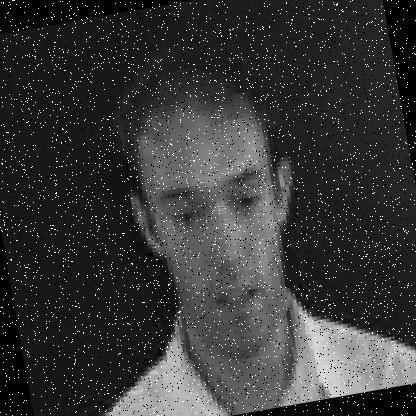

In [ ]:
img = image.load_img('drive//MyDrive//eINTERFACE_2021_Image//test//Anger//18_jpg.rf.0bcb0d6d9667a17eace6abf2e690dece.jpg')

#img = image.load_img('images//train//angry//0.jpg')

img

In [ ]:
cv2.imread('drive//MyDrive//eINTERFACE_2021_Image//test//Anger//18_jpg.rf.0bcb0d6d9667a17eace6abf2e690dece.jpg').shape

(416, 416, 3)

In [ ]:
import numpy as np
from os import listdir
from os.path import join, isdir
from glob import glob
import cv2
import timeit

# number of channels of the dataset image, 3 for color jpg, 1 for grayscale img
# you need to change it to reflect your dataset
CHANNEL_NUM = 3


def cal_dir_stat(root):
    cls_dirs = [d for d in listdir(root) if isdir(join(root, d))]
    pixel_num = 0 # store all pixel number in the dataset
    channel_sum = np.zeros(CHANNEL_NUM)
    channel_sum_squared = np.zeros(CHANNEL_NUM)

    for idx, d in enumerate(cls_dirs):
        print("#{} class".format(idx))
        im_pths = glob(join(root, d, "*.jpg"))

        for path in im_pths:
            im = cv2.imread(path) # image in M*N*CHANNEL_NUM shape, channel in BGR order
            im = im/255.0
            pixel_num += (im.size/CHANNEL_NUM)
            channel_sum += np.sum(im, axis=(0, 1))
            channel_sum_squared += np.sum(np.square(im), axis=(0, 1))

    bgr_mean = channel_sum / pixel_num
    bgr_std = np.sqrt(channel_sum_squared / pixel_num - np.square(bgr_mean))
    
    # change the format from bgr to rgb
    rgb_mean = list(bgr_mean)[::-1]
    rgb_std = list(bgr_std)[::-1]
    
    return rgb_mean, rgb_std

# The script assumes that under train_root, there are separate directories for each class
# of training images.
train_root = "output_Emotion//train//"
start = timeit.default_timer()
mean, std = cal_dir_stat(train_root)
end = timeit.default_timer()
print("elapsed time: {}".format(end-start))
print("mean:{}\nstd:{}".format(mean, std))

#0 class
#1 class
#2 class
#3 class
#4 class
#5 class
elapsed time: 111.20836064500003
mean:[0.21988911368700612, 0.21988911368700612, 0.21988911368700612]
std:[0.20910093443540947, 0.20910093443540947, 0.20910093443540947]


In [ ]:
#import os

#print(os.getcwd())

In [ ]:
#import glob
#import numpy as np
#import cv2
 
# Import all image files with the .jpg extension
#files = glob.glob ("*.jpg")
#image_data = []
#for my_file in files:
 #   this_image = cv2.imread(my_file, 1)
  #  image_data.append(this_image)
 
# Calculate blended image
#dst = image_data[0]
#for i in range(len(image_data)):
 #   if i == 0:
  #      pass
   # else:
    #    alpha = 1.0/(i + 1)
     #   beta = 1.0 - alpha
      #  dst = cv2.addWeighted(image_data[i], alpha, dst, beta, 0.0)
 
# Save blended image
#cv2.imwrite('weather_forecast.png', dst)

In [ ]:
train = ImageDataGenerator(rescale=1./255,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True)

val = ImageDataGenerator(rescale = 1./255)

test = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset= train.flow_from_directory('output_Emotion//train//',
                                         target_size =(100,100),
                                        batch_size = 128,
                                         class_mode = 'categorical',
                                         shuffle =True)

val_dataset= val.flow_from_directory('output_Emotion//val//',
                                         target_size =(100,100),
                                         batch_size = 128,
                                        class_mode = 'categorical',
                                        shuffle = False)

test_dataset= test.flow_from_directory('output_Emotion//test//',
                                         target_size =(100,100),
                                         batch_size = 128,
                                        class_mode = 'categorical',
                                        shuffle = False)



Found 11475 images belonging to 6 classes.
Found 1433 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


In [ ]:
train_dataset.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters = 32,kernel_size=3,activation = 'relu',input_shape = (100,100,3),padding ='same'),
                                    tf.keras.layers.MaxPool2D(pool_size =(2,2),strides = (2,2)),
                      

                                    tf.keras.layers.Conv2D(filters = 64,kernel_size=3,activation = 'relu',padding='same'),
                                    

                                    tf.keras.layers.Conv2D(filters = 128,kernel_size=3,activation = 'relu',padding='same'),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.MaxPool2D(pool_size =(2,2),strides = (2,2)),

                                    #tf.keras.layers.Conv2D(filters = 256,kernel_size=3,activation = 'relu'),
                                    #tf.keras.layers.Dropout(0.1),

                                    #tf.keras.layers.Conv2D(filters = 512,kernel_size=3,activation = 'relu'),
                                    #tf.keras.layers.Dropout(0.1),
                                    #tf.keras.layers.MaxPool2D(pool_size =2),

                                    #tf.keras.layers.Conv2D(filters = 1024,kernel_size=3,activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(pool_size =(2,2),strides = (2,2)),
                                    #tf.keras.layers.Dropout(0.1),

                                    

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(256,activation='relu'),
                                    

                            

                                    tf.keras.layers.Dense(6,activation='softmax')

                                      
                                    ])

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer ='adam',  #make dataset into 80 and 20 percent
              metrics = ['accuracy'])

In [ ]:
import timeit

start = timeit.default_timer()

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 80, #keep as 80
                      epochs =80, #increase to 140, try to get accuracy of 95% #keep as 80
                      validation_data=val_dataset,
                      shuffle = False
                      )

Epoch 1/80
80/80 [==============================] - 89s 697ms/step - loss: 1.8266 - accuracy: 0.1810 - val_loss: 1.7215 - val_accuracy: 0.2652
Epoch 2/80
80/80 [==============================] - 55s 692ms/step - loss: 1.6254 - accuracy: 0.3306 - val_loss: 1.4302 - val_accuracy: 0.4278
Epoch 3/80
80/80 [==============================] - 56s 696ms/step - loss: 1.4179 - accuracy: 0.4170 - val_loss: 1.3078 - val_accuracy: 0.4557
Epoch 4/80
80/80 [==============================] - 56s 697ms/step - loss: 1.2205 - accuracy: 0.5159 - val_loss: 1.1238 - val_accuracy: 0.5457
Epoch 5/80
80/80 [==============================] - 56s 697ms/step - loss: 1.0662 - accuracy: 0.5772 - val_loss: 1.0239 - val_accuracy: 0.6043
Epoch 6/80
80/80 [==============================] - 56s 695ms/step - loss: 0.9446 - accuracy: 0.6296 - val_loss: 0.9285 - val_accuracy: 0.6134
Epoch 7/80
80/80 [==============================] - 55s 692ms/step - loss: 0.8390 - accuracy: 0.6764 - val_loss: 0.9538 - val_accuracy: 0.6420

In [ ]:
stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  4452.964481105


In [ ]:
#ask about imbalanced dataset.

#shuffle them properly

In [ ]:
prediction = model.predict(test_dataset,verbose = 1,)

12/12 [==============================] - 5s 379ms/step


In [ ]:
test_dataset.image_shape

(100, 100, 3)

In [ ]:
import numpy

predicted_classes = numpy.argmax(prediction, axis=1)

In [ ]:
true_classes = test_dataset.classes
class_labels = list(test_dataset.class_indices.keys()) 

In [ ]:
from sklearn import metrics

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

              precision    recall  f1-score   support

       Anger       0.94      0.98      0.96       237
     Disgust       0.88      0.93      0.90       237
        Fear       0.93      0.84      0.88       241
   Happiness       0.96      0.82      0.88       241
     Sadness       0.89      0.93      0.91       241
    Surprise       0.87      0.95      0.90       241

    accuracy                           0.91      1438
   macro avg       0.91      0.91      0.91      1438
weighted avg       0.91      0.91      0.91      1438



In [ ]:
labelss = [0,1,2,3,4,5]

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_true = true_classes, y_pred =predicted_classes)

In [ ]:
confusion_matrix

array([[232,   3,   1,   0,   1,   0],
       [ 11, 221,   0,   0,   2,   3],
       [  1,  21, 203,   5,   7,   4],
       [  2,   3,  10, 198,  13,  15],
       [  0,   3,   1,   1, 223,  13],
       [  1,   1,   4,   3,   4, 228]])

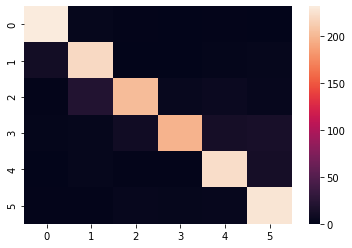

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix)

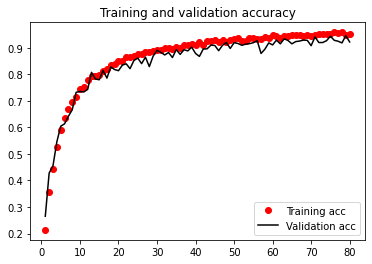

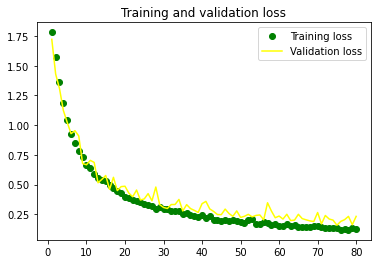

<Figure size 432x288 with 0 Axes>

In [ ]:
#from keras.callbacks import History 
#history = History()
epochs = 5

train_loss = model_fit.history['loss']
val_loss   = model_fit.history['val_loss']
train_acc  = model_fit.history['accuracy']
val_acc    = model_fit.history['val_accuracy']
xc         = range(epochs)


import matplotlib.pyplot as plt

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training acc',color ='r')
plt.plot(epochs, val_acc, 'b', label='Validation acc',color='black')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'bo', label='Training loss',color='green')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='yellow')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.savefig('Train vs Test.png')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = accuracy_score(true_classes,predicted_classes)

In [ ]:
acc

0.9075104311543811